In [1]:
import cv2 as cv
import cv2

from matplotlib import pyplot as plt

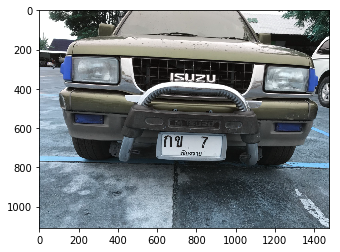

In [2]:
image = cv.imread('./cars/img/S_8167620536848.jpg')
plt.imshow(image)

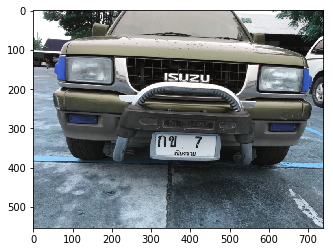

In [3]:
im_resize = cv.resize(image,None,fx=0.5,fy=0.5)
plt.imshow(im_resize)

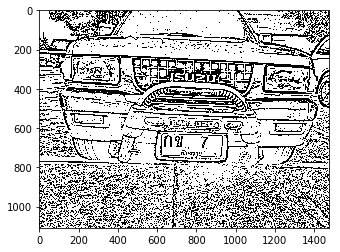

In [4]:
imggray = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
th3 = cv2.adaptiveThreshold(imggray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,31,5)
plt.imshow(th3,cmap='gray')

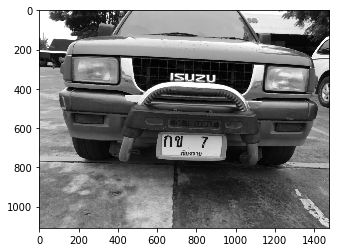

In [5]:
gray_image = imggray
gray_image = cv2.medianBlur(gray_image, 5);
plt.imshow(gray_image,cmap='gray')

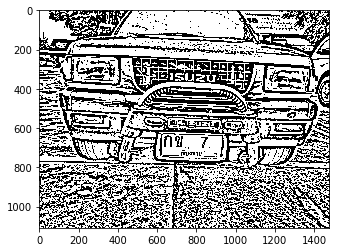

In [6]:
gray_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 43,2)
plt.imshow(gray_image,cmap='gray')

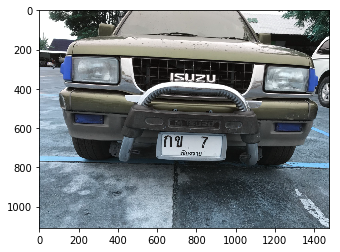

In [7]:

_,contours,_ = cv2.findContours(gray_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE);

roi = []
w,h,x,y = 0,0,0,0;
i = 1;
for contour in contours:
    area = cv2.contourArea(contour);

    # rough range of areas of a license plate
    #if area > 6000 and area < 40000:
    if True :
        [x,y,w,h] = cv2.boundingRect(contour);

    # rough dimensions of a license plate
    if w > 100 and w < 1000 and h > 100 and h < 1000:
    #if True :
        roi.append([x,y,w,h]);
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 10);
        outputRect = image[y:y+h,x:x+w,:]
        cv2.imwrite("./cars/rects/" + str(i) + ".jpg",outputRect)
        i+=1
plt.imshow(image)